<b>Problem</b>:House Price prediction and predictor variables identification.

<b>Problem Statement:</b>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1.Which variables are significant in predicting the price of a house, and

2.How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Index

## [Step 1.Data Understanding,Cleaning and EDA](#step1)
[1.1 Sanity Checks & Outlier Analysis](#step1.1)<br>
[1.2 Missing values analysis](#step1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.21 Handling the missing values in Categorical columns](#step1.21)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.22 Handling the missing values in Numerical Columns](#step1.22)<br>
[1.3 Cleaning and visualizing Categorical columns](#step1.3)<br>
[1.4 Cleaning and visualizing Numerical Columns ](#step1.4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.41 Understanding the Target variable - "SalePrice"](#step1.41)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.42 Identifying highly correlated columns](#step1.42)<br>

## [Step 2. Data Pre-Processing](#step2)
[2.1 Creating Dummies for Categorical variables](#step2.1)<br>
[2.2 Train and Test data split](#step2.2)<br>
[2.3 Scaling the Numerical variables](#step2.3)<br>

## [Step 3. Model Building](#step3)
[Step 3.1 Ridge Regression](#step3.1)<br>
[Step 3.2Lasso Regression](#step3.2)<br>

## [Step 4. Test Evaluation and Final Analysis](#step4)
[Step 4.1 Evaluation using Ridge Regression Model](#step4.1)<br>
[Step 4.2 Evaluation using Lasso Regression Model](#step4.2)<br>

In [1]:
## Importing libraries at one place for better segregration of the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')



## 1.Data Understanding,Cleaning and EDA <a id='step1'></a>

### 1.1 Sanity Checks and Outlier Analysis<a id='step1.1'></a>

In [2]:
house_df=pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_df.describe(percentiles=(0.1,0.25,0.5,0.75,0.9,0.99))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


##### Outlier Analysis:

After observing the values at different percentiles like 25,50,75,90,99 ,<br>

the variables like 'LotFrontage','MasVnrArea','SalePrice' recorded a consistent increase in the values <br>
wheareas the variables like 'PoolArea','MiscVal','EnclosedPorch','LotArea' recorded a sudden spike between the 99th percentile value and the maximum value.<br>

Eventhough,some outliers exist,retaining them as those rows may pertain to unique,one-of-a-kind houses and can help in company's decision model.
 

In [6]:
print((house_df.describe().columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


### 1.2 Missing values analysis<a id='step1.2'></a>

A reusable function "check_missing_values()" has been created to check for the missing values after imputing for each variable.

In [7]:
def check_missing_values():
    temp=pd.DataFrame(round(100*(house_df.isnull().sum()/len(house_df.index)),2))
    temp=temp.reset_index()
    temp.columns=['column','missing%']
    temp.sort_values(by='missing%',ascending=False)
    print(temp[temp['missing%']>0][['column','missing%']].sort_values(by='missing%',ascending=False))
#temp.to_csv('dasf.csv')


In [8]:
check_missing_values()

          column  missing%
72        PoolQC     99.52
74   MiscFeature     96.30
6          Alley     93.77
73         Fence     80.75
57   FireplaceQu     47.26
3    LotFrontage     17.74
58    GarageType      5.55
59   GarageYrBlt      5.55
60  GarageFinish      5.55
63    GarageQual      5.55
64    GarageCond      5.55
32  BsmtExposure      2.60
35  BsmtFinType2      2.60
33  BsmtFinType1      2.53
31      BsmtCond      2.53
30      BsmtQual      2.53
26    MasVnrArea      0.55
25    MasVnrType      0.55
42    Electrical      0.07


#### Observations:

Even though the missing values in PoolQC,MiscFeatures column are more,those are valid NA values which hold a valid value as per the data dictionary .Hence,not deleting any features and converting the NA categories to a interpretable value (based on the data dictionary ) so that the model do not consider them as actual missing values.

#### 1.21 Handling the missing values in Categorical columns<a id='step1.21'></a>

Cleaning the missing values in categorical columns by replacing with a new category as they are valid values but being treated as missing.

In [9]:
dc_categorical={'PoolQC':'NP','MiscFeature':'NN','Alley':'NAA','Fence':'NF','FireplaceQu':'NF','GarageType':'NG',
                   'GarageFinish':'NG','GarageQual':'NG','GarageCond':'NG','BsmtFinType2':'NB','BsmtFinType1':'NB',
                   'BsmtCond':'NB','BsmtQual':'NB','BsmtExposure':'NB','MasVnrType':'None'}

for col in dc_categorical:
    house_df.loc[house_df[col].isnull(),col]=dc_categorical[col]
    
    

##### Electrical

Replacing the missing values with the mode of the column.

In [10]:
house_df.loc[house_df['Electrical'].isnull(),'Electrical']=house_df['Electrical'].mode()[0]

In [11]:
check_missing_values()

         column  missing%
3   LotFrontage     17.74
59  GarageYrBlt      5.55
26   MasVnrArea      0.55


#### 1.22 Handling the missing values in Numerical Columns<a id='step1.22'></a>

##### LotFrontage:
1.Since the LotConfig for most of the rows where LotFrontage is "NA" is either "Inside","Corner", or "Cul-de-Sac",replacing the LotFrontage=0 as this means that Lot is not beside a street.

2.Replacing the LotFrontage where the LotConfig is "FR2(Frontage on 2 sides of property)" with mean of that(FR2) Subcategory as frontage is avaiable.

In [12]:
house_df.loc[((house_df['LotFrontage'].isnull()) & (house_df['LotConfig'].isin(['Corner','Inside','CulDSac']))),'LotFrontage']=0


house_df.loc[((house_df['LotFrontage'].isnull()) & (house_df['LotConfig']=='FR2')),'LotFrontage']=house_df.loc[house_df['LotConfig']=='FR2','LotFrontage'].mean()


##### GarageYrBlt

Since these are the rows where Garage is not available for the house,updating the year as 0 as garage is never built.

In [13]:
house_df.loc[house_df['GarageYrBlt'].isnull(),'GarageYrBlt']=0

##### MasVnrArea

These are the rows where Masonry veneer type is None from which we can impute the missing values are 0 for the Masonry veneer area.

In [14]:
house_df.loc[house_df['MasVnrArea'].isnull(),'MasVnrArea']=0

In [15]:
check_missing_values()

Empty DataFrame
Columns: [column, missing%]
Index: []


##### Creating list of Numerical and Categorical columns

<b>Numerical columns</b> : 
                    Using the columns list from describe() function.<br>
<b>Categorical columns</b>:
                    Using the select_dtype() function.<br>

"MSSubClass" feature has numerical values but this is an unordered categorical column.Hence,moved it to categorical list.


In [16]:
Num_cols=list(house_df.describe().columns)
Num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
cat_cols=list(house_df.select_dtypes(include='object').columns)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
#
cat_from_num=['MSSubClass']
#Removing the categorical columns from Num_cols list

for i in cat_from_num:
    Num_cols.remove(i)
    cat_cols.append(i)


In [19]:
Num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [20]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [21]:
len(cat_cols)

44

In [22]:
len(Num_cols)

37

### 1.3 Cleaning and visualizing Categorical columns <a id='step1.3'></a>

1.Special handling of "MSSubClass" feature has been done by replacing the numerical codes with actual categories.

2.Two reusable functions have been written to check skewness of categorical data and plot them.

In [23]:
msclass_dict={20: '1-STORY NEWER',30: '1-STORY OLDER',40: '1-STORY FINISHED ATTIC',45: '1-1/2 STORY - UNFINISHED',50: '1-1/2 STORY FINISHED',60: '2-STORY NEWER',70: '2-STORY OLDER',75: '2-HALF STORY ALL AGES',80: 'SPLIT OR MULTI-LEVEL',85: 'SPLIT FOYER',90: 'DUPLEX ALL STYLES',120: '1-STORY PUD NEWER',150: '1-1/2 STORY PUD ALL AGES',160: '2-STORY PUD NEWER',180: 'PUD - MULTILEVEL',190: '2 FAMILY CONVERSION'}

In [24]:
#msclass_dict
house_df['MSSubClass']=house_df.MSSubClass.apply(lambda x:msclass_dict[x])
house_df['MSSubClass']

0       2-STORY NEWER
1       1-STORY NEWER
2       2-STORY NEWER
3       2-STORY OLDER
4       2-STORY NEWER
            ...      
1455    2-STORY NEWER
1456    1-STORY NEWER
1457    2-STORY OLDER
1458    1-STORY NEWER
1459    1-STORY NEWER
Name: MSSubClass, Length: 1460, dtype: object

In [25]:
house_df.MSSubClass.value_counts().sort_values()

1-STORY FINISHED ATTIC        4
PUD - MULTILEVEL             10
1-1/2 STORY - UNFINISHED     12
2-HALF STORY ALL AGES        16
SPLIT FOYER                  20
2 FAMILY CONVERSION          30
DUPLEX ALL STYLES            52
SPLIT OR MULTI-LEVEL         58
2-STORY OLDER                60
2-STORY PUD NEWER            63
1-STORY OLDER                69
1-STORY PUD NEWER            87
1-1/2 STORY FINISHED        144
2-STORY NEWER               299
1-STORY NEWER               536
Name: MSSubClass, dtype: int64

In [26]:
def check_skewness(X):
    count_of_values = house_df[X].value_counts().values
    count_of_values = count_of_values/len(house_df)
    col_of_values = list(house_df[X].value_counts().index)
    dict_data = {}
    for i in range(0,len(col_of_values)):
        dict_data[col_of_values[i]] = count_of_values[i]
    df = pd.DataFrame(data=dict_data,index=[X])
    return df

##### Visualizing Categorical variables

In [27]:
def plot_cat_cols(col,i):
    
    
    sns.set(font_scale=2.5)
    ax = plt.subplot(10,5,i+1)
    check_skewness(col).plot(kind='bar',stacked=True,ax = ax)
    plt.xticks(rotation=0)
    ax.set_ylim([0.0,1.0])
    

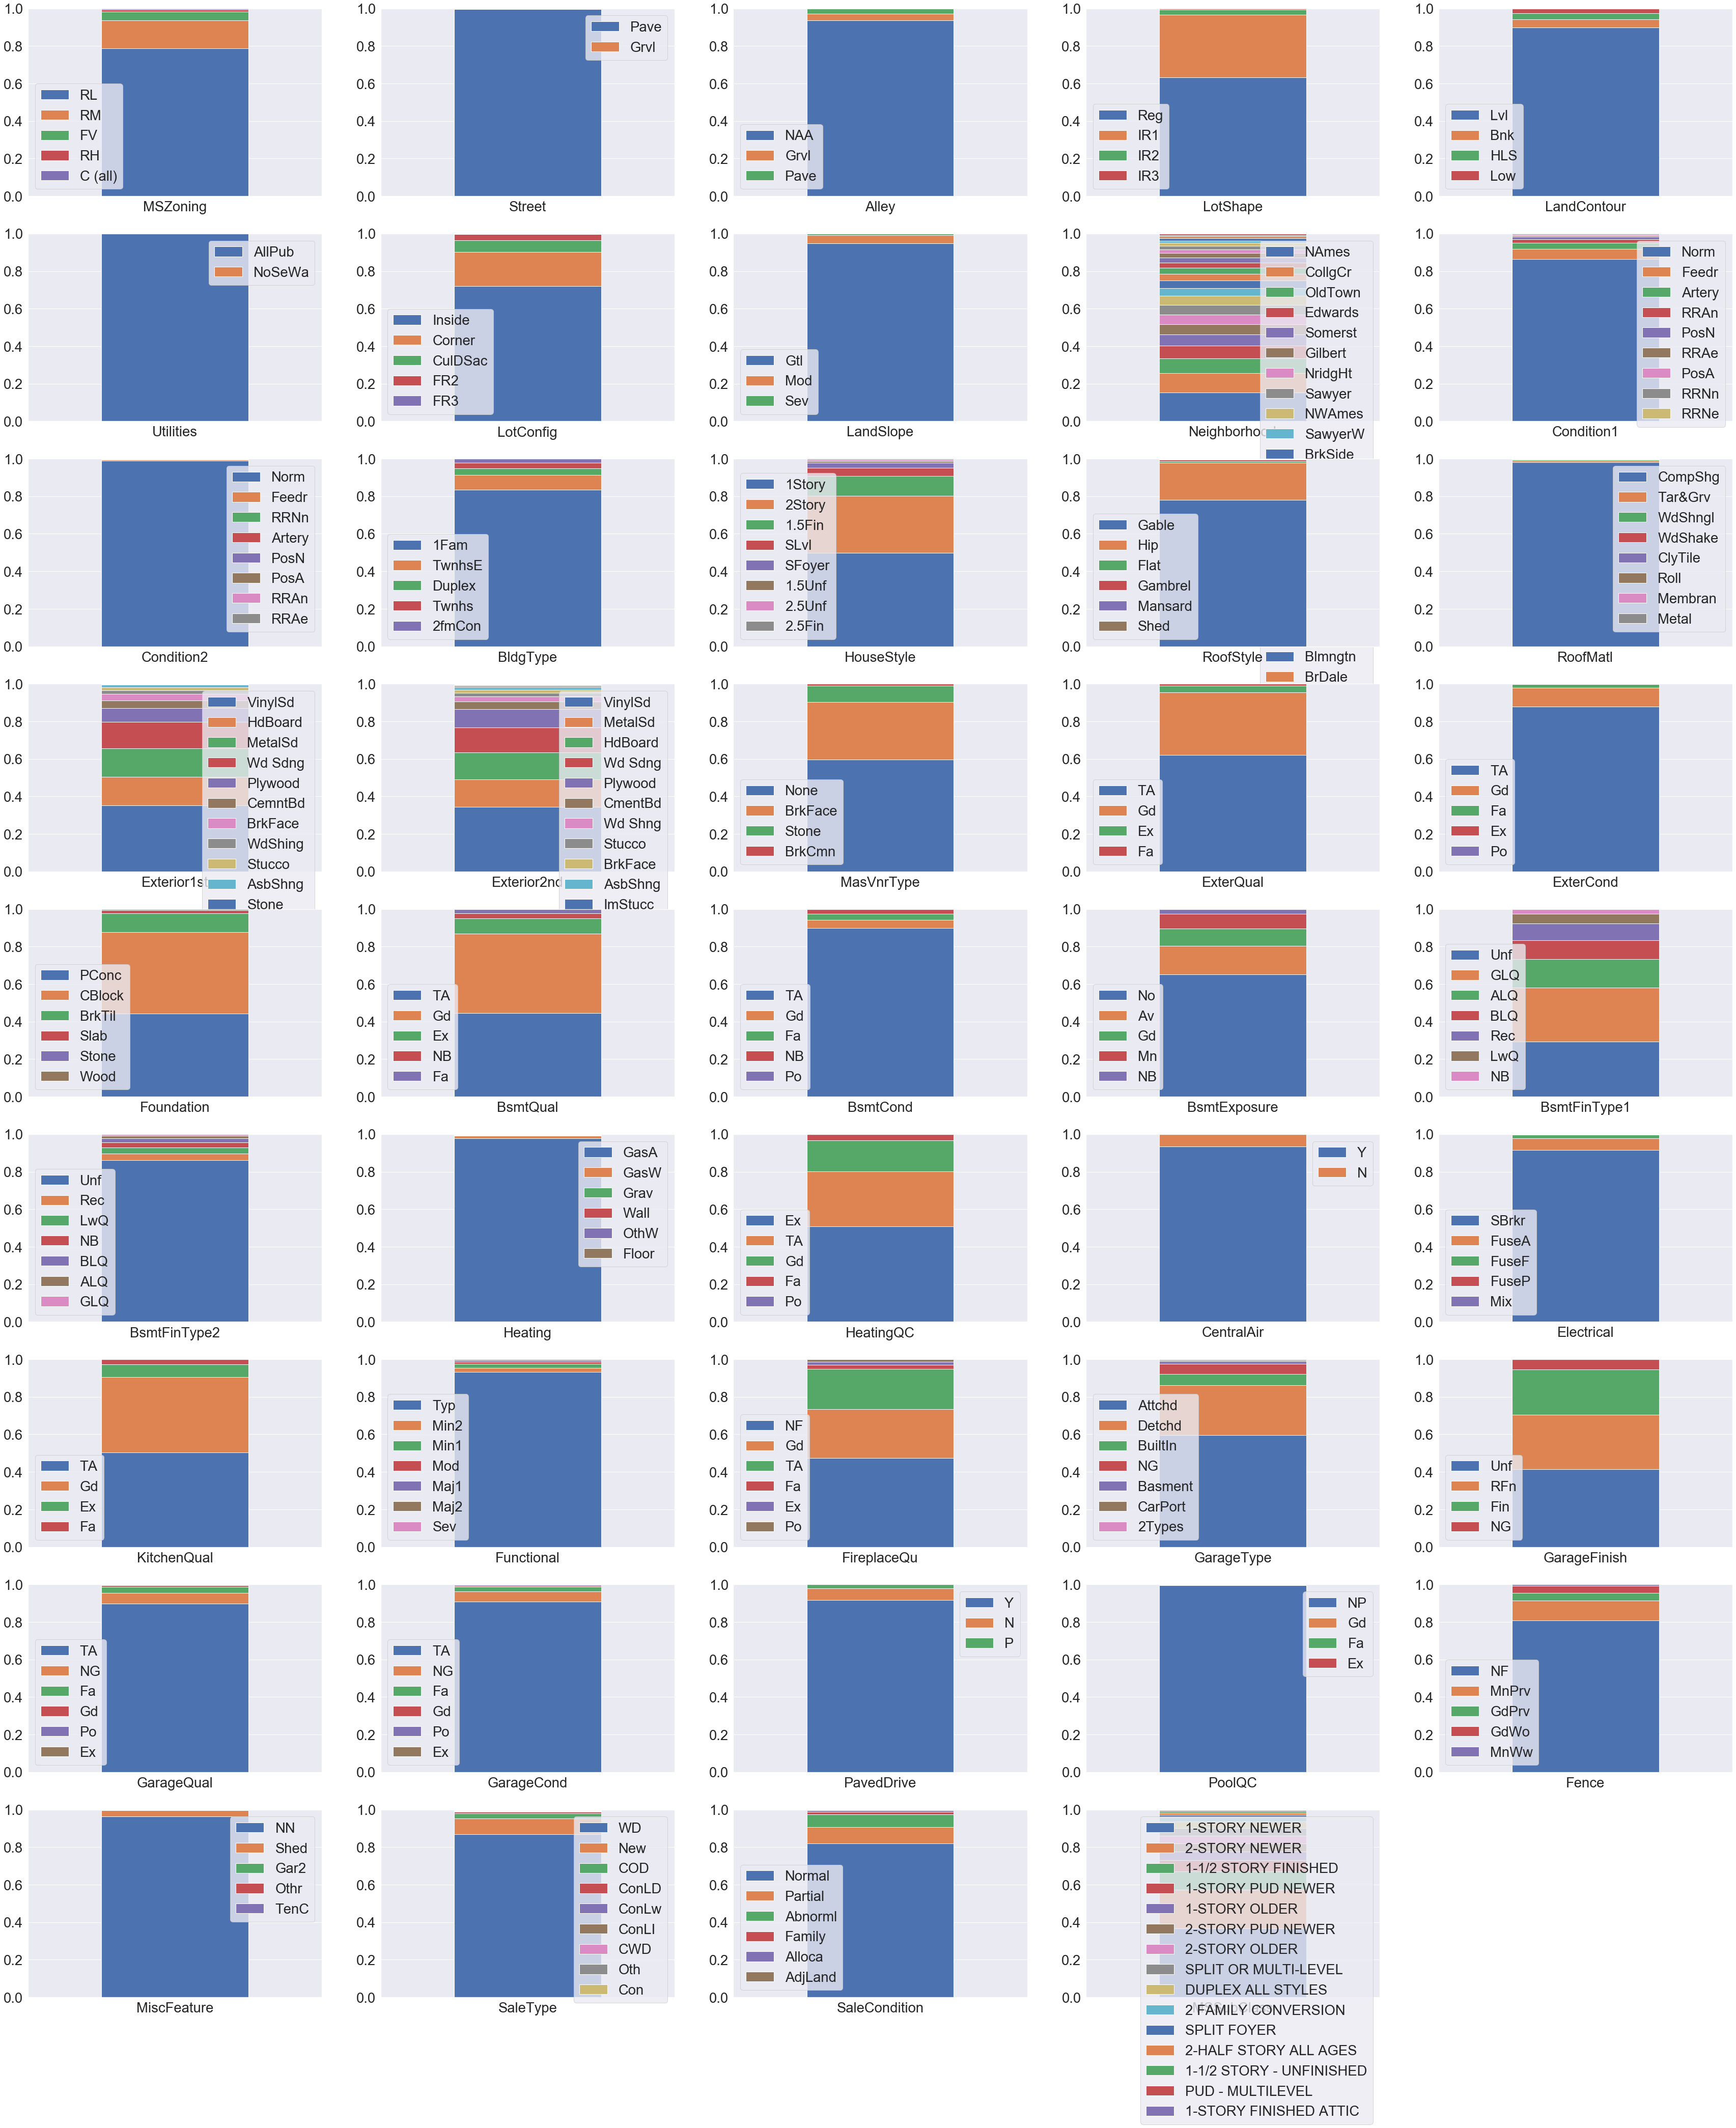

In [28]:
plt.figure(figsize=(60,80))
for i in range(len(cat_cols)):
    plot_cat_cols(cat_cols[i],i)


#### Observation:

1.A good number of columns like PoolQC,CentralAir,Heating are highly skewed(most of the datapoints have one value)<br>


#### Plotting Bar graphs of few important categorical variables against SalePrice to analyse the impact

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

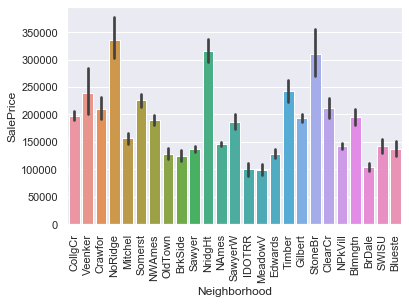

In [29]:
sns.set(font_scale=1)
sns.barplot(data=house_df,x='Neighborhood',y='SalePrice')
plt.xticks(rotation=90)

##### Observations:

1.The Neighborhoods like NorthRidge,Stone Brook,NorthRidge Heights seem costlier than other areas.<br>
2.Whereas the neighborhoods like Iowa DOT and Rail Road,MeadowVillage and BriarDale have cheaper houses.<br>
3.The company can start looking at the later areas in the beginning to try out the strategies of buying and reselling at higher cost.


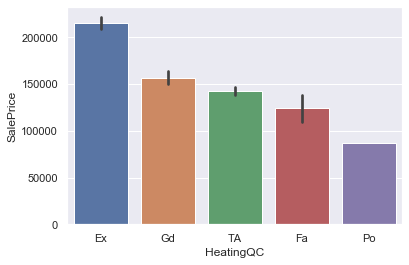

In [30]:
sns.barplot(data=house_df,x='HeatingQC',y='SalePrice')

##### Observations:

1.As Australia is one of the coldest countries ,Heating quality of the houses seem to be an important consideration for purchasing the houses and seem to have an impact on the SalePrice of the houses.<br>

2.The Better the quality of heating ,the higher the price of the house.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

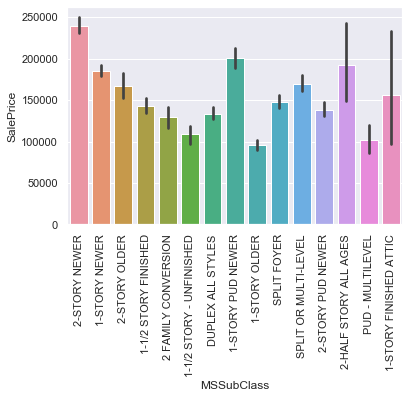

In [31]:
sns.barplot(data=house_df,x='MSSubClass',y='SalePrice')
plt.xticks(rotation=90)

###### Observation:

1.The type of the houses that are on the higher side of the price are - 2-STORY 1946 & NEWER,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-1/2 STORY ALL AGES.<br>
2.And the type of houses that are on the lower side of the price are - 1-STORY 1945 & OLDER,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER which give a great scope of investment for the company to try out different strategies of purchase and resale of the houses.

              

#### 1.4 Cleaning and visualizing Numerical Columns<a id='step1.4'></a> 

##### 1.41 Understanding the Target variable - "SalePrice"<a id='step1.41'></a>


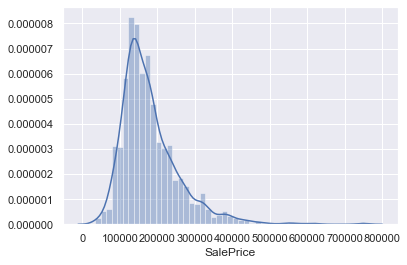

In [32]:
sns.set(font_scale=1)
sns.distplot(house_df['SalePrice'])

##### Observation:
As the distribution is rightly skewed,applying the logarithmic transformation.

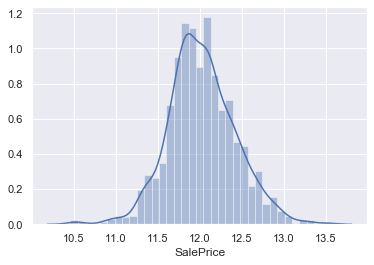

In [33]:
house_df['SalePrice']=np.log(house_df['SalePrice'])
sns.distplot(house_df['SalePrice'])

##### Converting year columns - GarageYrBlt,YrSold,YearBuilt,YearRemodAdd to respective Age columns to convert to Ordinal columns

In [34]:
year_cols=['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd']
for yr in year_cols:
    house_df[yr]=house_df[yr].max()-house_df[yr]

##### 1.42 Identifying highly correlated columns<a id='step1.42'></a>

Since the heatmap is not interpretable from 37 X 37 matrix for identifying highly correlated columns,the correlation values in tabular format have been used to identify the highly correlated variables as below.

In [35]:
house_df[Num_cols].corr().unstack().reset_index()

,level_0,level_1,0
0,Id,Id,1.000000
1,Id,LotFrontage,-0.017396
2,Id,LotArea,-0.033226
3,Id,OverallQual,-0.028365
4,Id,OverallCond,0.012609
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [36]:
house_corrdf = house_df[Num_cols].corr().where(np.triu(np.ones(house_df[Num_cols].corr().shape),k=1).astype(np.bool))
house_corrdf

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,NaN,-0.017396,-0.033226,-0.028365,0.012609,0.012713,0.021998,-0.051071,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.000712,-0.017942
LotFrontage,NaN,NaN,0.105120,0.179513,-0.055387,-0.044401,-0.085169,0.106850,0.080890,-0.011495,...,-0.015478,0.075192,0.021336,0.029039,0.018466,0.114428,-0.059538,0.010485,0.011702,0.182968
LotArea,NaN,NaN,NaN,0.105806,-0.005636,-0.014228,-0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.257320
OverallQual,NaN,NaN,NaN,NaN,-0.091932,-0.572323,-0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.027347,0.817184
OverallCond,NaN,NaN,NaN,NaN,NaN,0.375983,-0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.043950,-0.036868
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.592855,-0.311600,-0.249503,0.049107,...,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.013618,-0.586570
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176529,-0.128451,0.067759,...,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,0.035743,-0.565608
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.008317,0.426775
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,-0.014359,0.372023
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.031706,0.004832


In [37]:
house_corrdf=house_corrdf.unstack().reset_index()
house_corrdf

,level_0,level_1,0
0,Id,Id,NaN
1,Id,LotFrontage,NaN
2,Id,LotArea,NaN
3,Id,OverallQual,NaN
4,Id,OverallCond,NaN
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [38]:
house_corrdf.columns=['var1','var2','correlation']
house_corrdf

,var1,var2,correlation
0,Id,Id,NaN
1,Id,LotFrontage,NaN
2,Id,LotArea,NaN
3,Id,OverallQual,NaN
4,Id,OverallCond,NaN
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [39]:
house_corrdf.dropna(subset=['correlation'],inplace=True)
house_corrdf

,var1,var2,correlation
37,LotFrontage,Id,-0.017396
74,LotArea,Id,-0.033226
75,LotArea,LotFrontage,0.105120
111,OverallQual,Id,-0.028365
112,OverallQual,LotFrontage,0.179513
...,...,...,...
1363,SalePrice,ScreenPorch,0.121208
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329


In [40]:
#### Identifying the positive correlations.
house_corrdf.sort_values(by='correlation',ascending=False).head(10)

,var1,var2,correlation
987,GarageArea,GarageCars,0.882475
829,TotRmsAbvGrd,GrLivArea,0.825489
455,1stFlrSF,TotalBsmtSF,0.819530
1335,SalePrice,OverallQual,0.817184
1347,SalePrice,GrLivArea,0.700927
568,GrLivArea,2ndFlrSF,0.687501
1357,SalePrice,GarageCars,0.680625
834,TotRmsAbvGrd,BedroomAbvGr,0.676620
1358,SalePrice,GarageArea,0.650888
600,BsmtFullBath,BsmtFinSF1,0.649212


In [41]:
#### Identifying the negative correlations.
house_corrdf.sort_values(by='correlation').head(10)

,var1,var2,correlation
949,GarageCars,GarageYrBlt,-0.598005
1337,SalePrice,YearBuilt,-0.586570
188,YearBuilt,OverallQual,-0.572323
1338,SalePrice,YearRemodAdd,-0.565608
986,GarageArea,GarageYrBlt,-0.560783
225,YearRemodAdd,OverallQual,-0.550684
930,GarageCars,YearBuilt,-0.537850
378,BsmtUnfSF,BsmtFinSF1,-0.495251
967,GarageArea,YearBuilt,-0.478954
671,FullBath,YearBuilt,-0.468271


In [42]:
house_corrdf.to_csv('house_correlation.csv')

###### Dropping highly correlated columns from the above matrix

In [43]:
corr_columns=['GarageCars','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','OverallQual','YearRemodAdd']
house_df.drop(corr_columns,axis=1,inplace=True)
for col in corr_columns:
    Num_cols.remove(col)

###### Visualizing numerical variables against SalePrice

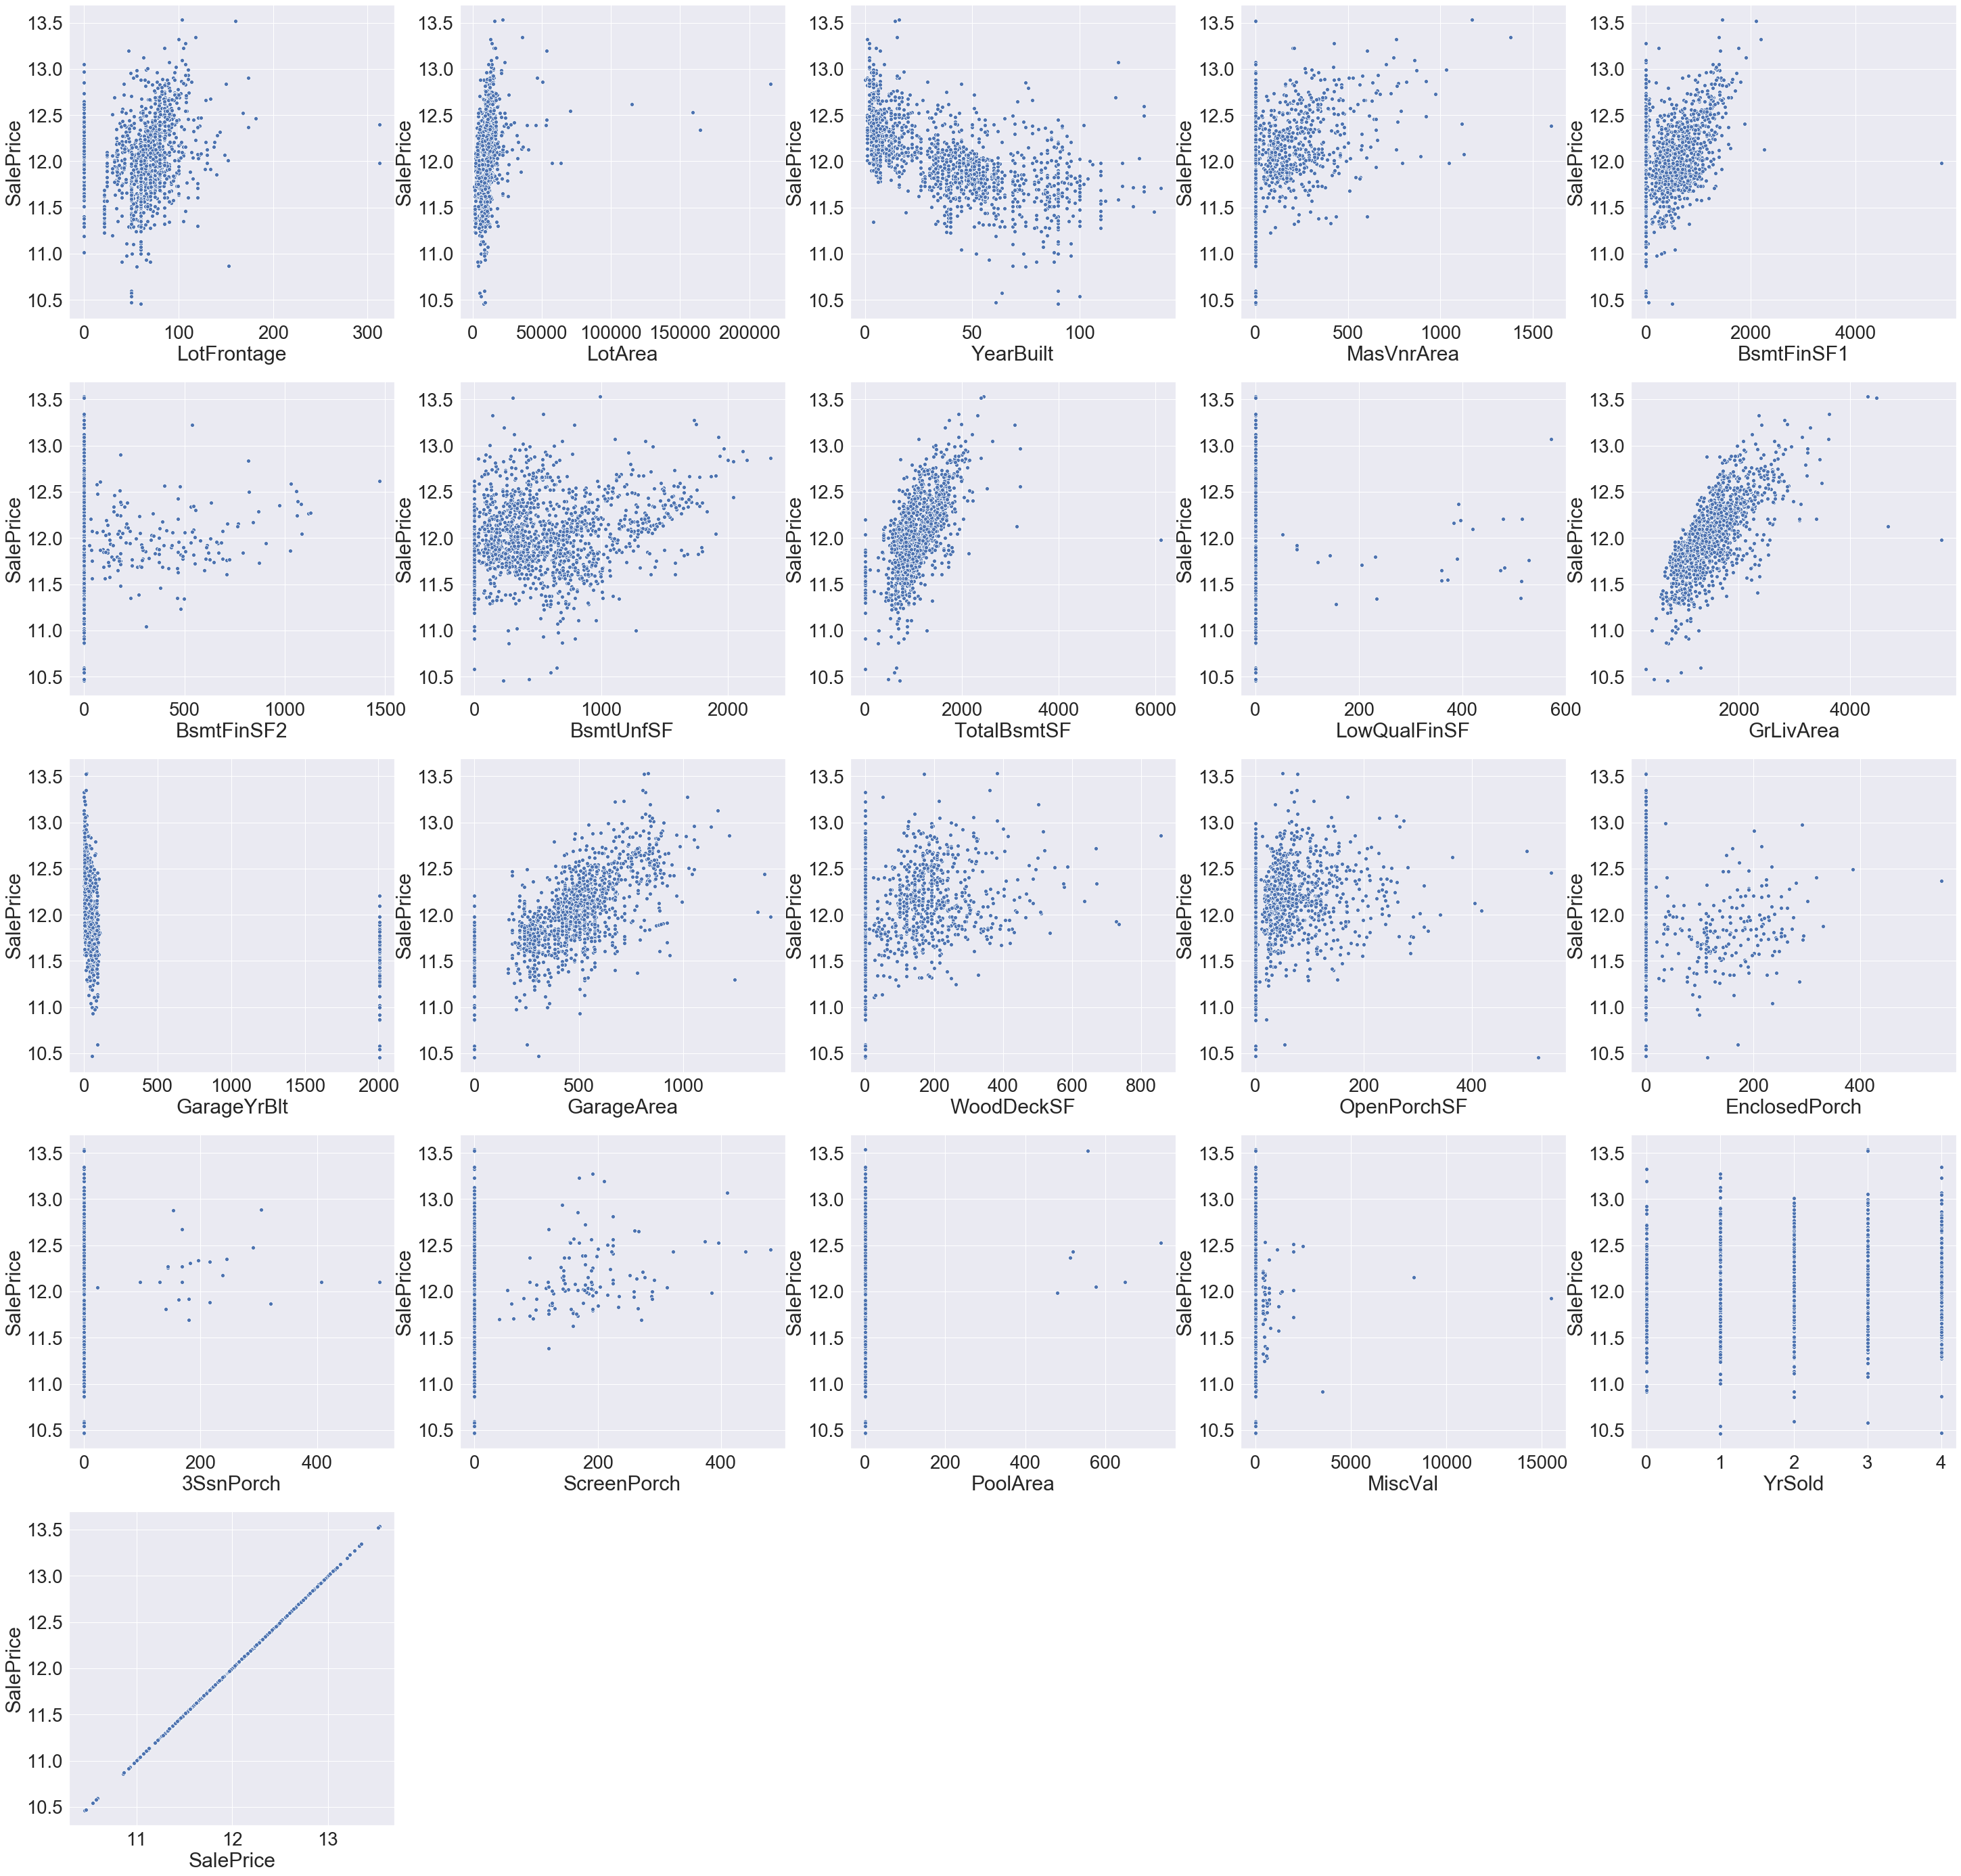

In [44]:
Num_cols.remove('Id')
ordinal_vars=['OverallCond','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','MoSold']
non_ordinal_vars=[col for col in Num_cols if col not in ordinal_vars]
plt.figure(figsize=(50,70))
sns.set(font_scale=2.5)
for i in range(0,len(non_ordinal_vars)):
    ax=plt.subplot(7,5,i+1)
    sns.scatterplot(x=non_ordinal_vars[i],y='SalePrice',data=house_df,ax=ax)
   

###### Observations:

From the above plots ,it is visible that<br>

1.The variables like GrLivArea,GarageArea,TotalBsmtSF are positively correlated with SalePrice.
2.And the variables like YearBuilt is negatively correlated with SalePrice.

Company can consider these factors into strategic planning 

##### Visualing Ordinal variables against SalePrice

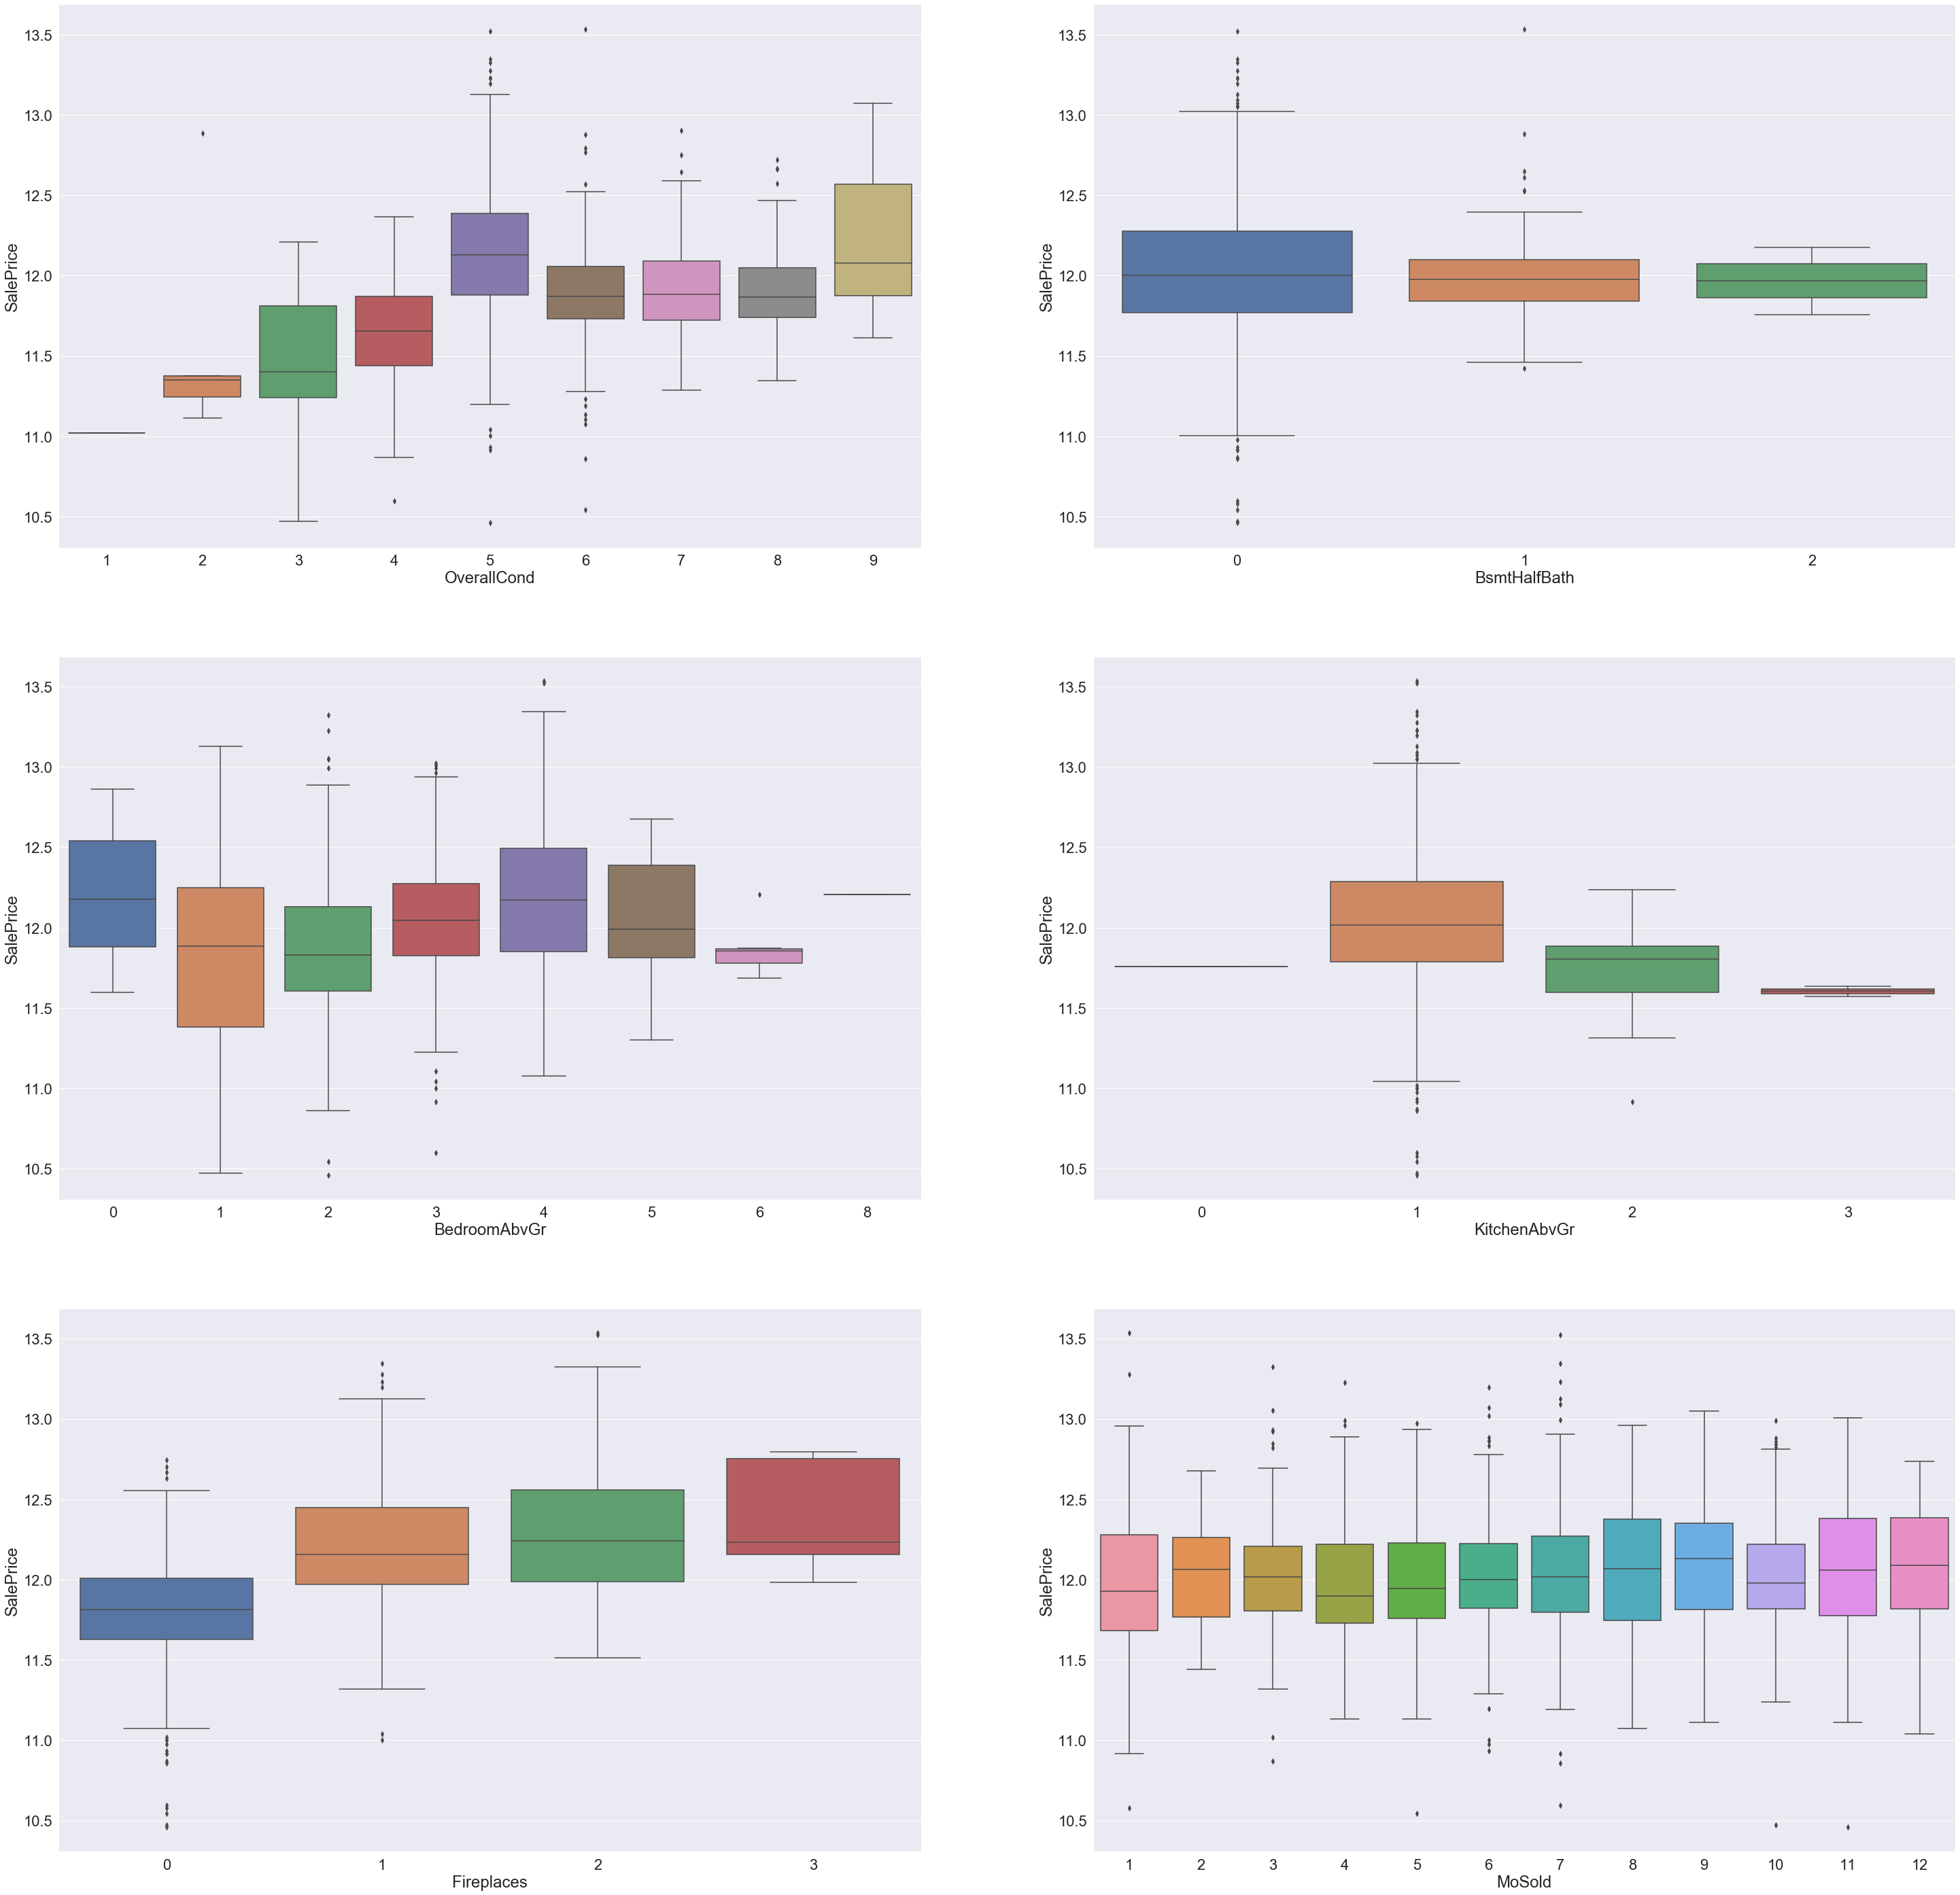

In [45]:

plt.figure(figsize=(50,50))
sns.set(font_scale=2)
for i in range(0,len(ordinal_vars)):
    ax=plt.subplot(3,2,i+1)
    sns.boxplot(x=ordinal_vars[i],y='SalePrice',data=house_df,ax=ax)
    

##### Observations:

1.The salePrice of the houses is proportionally more when the OverallCondition of the house is excellent and the number of fireplaces are more.(Again probably owing to the reason that Australia is a one of the coolest countries)<br>
2.On the other hand,the salePrice is lower when the number of kitchens and bedrooms are more.<br>
3.Month of sale doesnt seem to have a major impact.
4.SalePrice is higher when the halfbathrooms in the basement is almost nill.

### 2.Data Pre-Processing<a id='step2'></a>

#### 2.1 Creating Dummies for Categorical columns<a id='step2.1'></a>

In [46]:
### dc_categorical holds the columns whose NA was a valid NA and they were replaced with appropriate categories based on the data dictionary.
## Hence,they can be considered as a candidate for removal during dummies creation
## Also,there are other columns from the above bar graph - CentralAir,PavedDrive,SaleType
## Instead of using dropFirst feature of getDummies,creating a dictionary and removing appropriate columns

dc_categorical['CentralAir']='N'
dc_categorical['PavedDrive']='N'
dc_categorical['SaleType']='Oth'
dc_categorical['MSSubClass']='1-STORY FINISHED ATTIC'
dc_categorical

{'PoolQC': 'NP',
 'MiscFeature': 'NN',
 'Alley': 'NAA',
 'Fence': 'NF',
 'FireplaceQu': 'NF',
 'GarageType': 'NG',
 'GarageFinish': 'NG',
 'GarageQual': 'NG',
 'GarageCond': 'NG',
 'BsmtFinType2': 'NB',
 'BsmtFinType1': 'NB',
 'BsmtCond': 'NB',
 'BsmtQual': 'NB',
 'BsmtExposure': 'NB',
 'MasVnrType': 'None',
 'CentralAir': 'N',
 'PavedDrive': 'N',
 'SaleType': 'Oth',
 'MSSubClass': '1-STORY FINISHED ATTIC'}

In [47]:
for col in dc_categorical:
    dumm=pd.get_dummies(house_df[col],prefix=col)
    house_df=pd.concat([house_df,dumm],axis=1)
    drop_col=col+'_'+dc_categorical[col]
    house_df.drop(drop_col,inplace=True,axis=1)
    house_df.drop(col,inplace=True,axis=1)

house_df.info(verbose=True)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 142 columns):
Id                                     int64
MSZoning                               object
LotFrontage                            float64
LotArea                                int64
Street                                 object
LotShape                               object
LandContour                            object
Utilities                              object
LotConfig                              object
LandSlope                              object
Neighborhood                           object
Condition1                             object
Condition2                             object
BldgType                               object
HouseStyle                             object
OverallCond                            int64
YearBuilt                              int64
RoofStyle                              object
RoofMatl                               object
Exterior1st          

In [48]:
#### using drop_first feature for the remaining categorical columns
for col in cat_cols:
    if col not in list(dc_categorical):
        dumm=pd.get_dummies(house_df[col],drop_first=True,prefix=col)
        house_df=pd.concat([house_df,dumm],axis=1)
        house_df.drop(col,axis=1,inplace=True)

house_df.info(verbose=True)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 265 columns):
Id                                     int64
LotFrontage                            float64
LotArea                                int64
OverallCond                            int64
YearBuilt                              int64
MasVnrArea                             float64
BsmtFinSF1                             int64
BsmtFinSF2                             int64
BsmtUnfSF                              int64
TotalBsmtSF                            int64
LowQualFinSF                           int64
GrLivArea                              int64
BsmtHalfBath                           int64
BedroomAbvGr                           int64
KitchenAbvGr                           int64
Fireplaces                             int64
GarageYrBlt                            float64
GarageArea                             int64
WoodDeckSF                             int64
OpenPorchSF                    

#### 2.2 Train and Test data split<a id='step2.2'></a>

In [49]:
y=house_df.pop('SalePrice')
X=house_df

In [50]:
X.drop(['Id'],axis=1,inplace=True) ### Dropping the id column as it is an identifier for each property.

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [52]:
X_train.shape

(1021, 263)

In [53]:
X_test.shape

(438, 263)

In [54]:
y_train

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
1009    11.532728
802     12.149502
53      12.860999
350     12.669998
79      11.608236
Name: SalePrice, Length: 1021, dtype: float64

#### 2.3 Scaling the Numerical variables<a id='step2.3'></a>

Scaling the training and test data seperately using the StandardScaler.

In [55]:
Num_cols

['LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

###### Scaling the training data

In [56]:
scaler=StandardScaler()

Num_cols.remove('SalePrice')
X_train[Num_cols]=scaler.fit_transform(X_train[Num_cols])
X_train[Num_cols].head()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
210,0.256443,-0.473765,0.383154,1.524903,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.124502,...,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.134653
318,0.936684,-0.056845,-0.533005,-0.717033,0.809137,1.160345,-0.293313,-0.454644,0.621579,-0.124502,...,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.881833
239,-0.187192,-0.169324,-1.449164,0.865510,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.124502,...,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-1.629012
986,0.019837,-0.502297,2.215472,2.019448,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.124502,...,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,1.359706
1416,0.049413,0.082905,0.383154,2.843689,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,-0.124502,...,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-1.629012


### 3.Model Building<a id='step3'></a>

In the upcoming steps,the Model is built using Ridge and Lasso Regression techniques and best one(based on the R2 Score on training and Test data sets) will be used for the final analysis.

In [57]:
X_train.head()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.256443,-0.473765,0.383154,1.524903,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.124502,...,0,0,0,0,1,0,0,0,1,0
318,0.936684,-0.056845,-0.533005,-0.717033,0.809137,1.160345,-0.293313,-0.454644,0.621579,-0.124502,...,0,0,0,0,1,0,0,0,1,0
239,-0.187192,-0.169324,-1.449164,0.865510,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.124502,...,0,0,0,0,1,0,0,0,1,0
986,0.019837,-0.502297,2.215472,2.019448,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.124502,...,0,0,0,0,1,0,0,0,1,0
1416,0.049413,0.082905,0.383154,2.843689,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,-0.124502,...,0,0,0,0,1,0,0,0,1,0


#### 3.1 Ridge Regression<a id='step3.1'></a>

Initially,the Ridge Regression model is built using a range of values for alpha and the scoring methodology-"negative mean absolute error" and the optimal value of alpha will be chosen by plotting the negative mean absolute error against alpha for both the train and test data sets.The alpha value, where the negative mean absolute value is closer to 0 is optimal for model building.

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=50]#### restricting the param_alpha to <=50 for better visualization of the plot
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013592,0.003135,0.002599,0.000800,0.0001,{'alpha': 0.0001},-0.099974,-0.097231,-0.109976,-0.093068,...,-0.098444,0.006442,24,-0.054357,-0.057669,-0.056204,-0.059374,-0.056864,-0.056894,0.001653
1,0.009595,0.000490,0.001798,0.000399,0.001,{'alpha': 0.001},-0.103424,-0.097175,-0.107478,-0.092459,...,-0.098467,0.006136,25,-0.054400,-0.057680,-0.056376,-0.059428,-0.056968,-0.056970,0.001643
2,0.012193,0.002038,0.002199,0.000748,0.01,{'alpha': 0.01},-0.105279,-0.097051,-0.104745,-0.091315,...,-0.097791,0.006320,23,-0.054604,-0.057779,-0.056771,-0.059539,-0.057224,-0.057183,0.001595
3,0.010195,0.001469,0.001998,0.001095,0.05,{'alpha': 0.05},-0.103623,-0.096953,-0.103192,-0.089164,...,-0.096344,0.006473,22,-0.055382,-0.058119,-0.057337,-0.060040,-0.058254,-0.057826,0.001509
4,0.011194,0.001599,0.001599,0.000490,0.1,{'alpha': 0.1},-0.102480,-0.097017,-0.101274,-0.087748,...,-0.095480,0.006145,13,-0.056215,-0.058472,-0.058031,-0.060843,-0.059417,-0.058596,0.001532


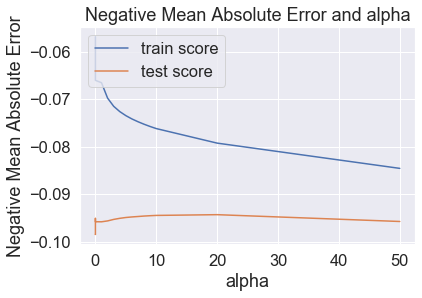

In [60]:

sns.set(font_scale=1.5)# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

###### Observation:

As the negative mean absolute error for the test data is tending towards 0 for the value ,approximately,close to 15.the optimal value of alpha has been chosen as 15.<br>

Also,multiple models have been built with alpha ranging between 8-20 and it has been observed that the r2 score did not record a significant change.This is also visible from the above plot,where the Negative mean absolute error is constant(high) between 10-20.

###### Fitting the model on the train data with the optimal value of alpha

In [61]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.41377033e-03,  1.67334584e-02,  4.97255377e-02, -6.38757934e-02,
        9.07046414e-04,  3.12229874e-03,  1.75125345e-02,  3.61624177e-03,
        1.32120194e-02, -4.34092718e-03,  1.43072664e-01, -3.28777792e-03,
        1.54785343e-02, -1.62468168e-02,  2.06651967e-02, -1.15739112e-03,
        4.24454928e-02,  1.30604323e-02,  4.97847199e-04,  1.02552333e-02,
        9.08483704e-03,  1.13351743e-02, -2.22443017e-02, -9.24483949e-04,
        6.66171957e-04,  5.40961738e-03,  4.90380015e-02,  2.44491725e-02,
       -8.99184578e-02, -1.11793658e-03, -1.75784733e-02, -1.67178014e-02,
        0.00000000e+00, -7.99396954e-03,  3.02081026e-02,  3.73375270e-02,
       -4.07915611e-02,  4.27595172e-03,  7.81262723e-03,  4.25894468e-02,
        1.09412667e-02,  3.27145392e-02, -2.75056280e-02,  2.34952055e-02,
       -1.09159499e-02,  2.86952739e-02, -1.16478758e-02,  1.90662127e-03,
       -1.00635256e-02,  2.17340606e-03,  1.84061745e-02,  2.30989438e-03,
       -2.05681190e-02,  

###### Analysing the Ridge coefficients

In [62]:
ridge_features=pd.concat([pd.Series(X_train.columns),pd.Series(ridge.coef_)],axis=1)
ridge_features.columns=['col','coeff']
ridge_features[ridge_features['coeff']!=0].sort_values(by='coeff')

,col,coeff
28,PoolQC_Gd,-0.089918
139,Neighborhood_Edwards,-0.089805
168,Condition2_PosN,-0.067194
3,YearBuilt,-0.063876
141,Neighborhood_IDOTRR,-0.062883
...,...,...
153,Neighborhood_Somerst,0.067996
138,Neighborhood_Crawfor,0.074510
79,BsmtQual_Ex,0.077199
148,Neighborhood_NridgHt,0.082133


###### Prediction using Ridge model

In [63]:
y_train_pred_ridge=ridge.predict(X_train)
y_train_pred_ridge

array([11.26767741, 12.71558506, 11.63924597, ..., 12.6336439 ,
       12.50447825, 11.62069597])

###### R2 score of the Ridge model on the Train dataset

In [64]:
print(r2_score(y_train,y_train_pred_ridge))

0.9112888271577261


#### 3.2 Lasso Regression<a id='step3.2'></a>

Similarly,the Lasso Regression model is built using the same range of values for alpha and the scoring methodology-"negative mean absolute error" and the optimal value of alpha will be chosen by plotting the negative mean absolute error against alpha for both the train and test data sets.The alpha value, where the negative mean absolute value is closer to 0 is optimal for model building.

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<1] #### restricting the param_alpha to < 1 for better visualization of the plot
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084352,0.008447,0.002398,0.001018,0.0001,{'alpha': 0.0001},-0.090058,-0.093819,-0.094083,-0.080703,...,-0.088008,0.005868,1,-0.059477,-0.061664,-0.060835,-0.062982,-0.062304,-0.061453,0.001216
1,0.016191,0.000980,0.001600,0.000489,0.001,{'alpha': 0.001},-0.088140,-0.098443,-0.095557,-0.078295,...,-0.089289,0.007152,2,-0.077404,-0.075161,-0.072292,-0.078684,-0.078739,-0.076456,0.002453
2,0.011193,0.000747,0.001400,0.000489,0.01,{'alpha': 0.01},-0.104294,-0.113730,-0.115210,-0.095436,...,-0.107607,0.007174,3,-0.105897,-0.097597,-0.103699,-0.109915,-0.106899,-0.104801,0.004120
3,0.010394,0.000490,0.001799,0.000400,0.05,{'alpha': 0.05},-0.132071,-0.142362,-0.145192,-0.136468,...,-0.139885,0.004886,4,-0.141447,-0.130093,-0.136558,-0.141642,-0.143644,-0.138677,0.004885
4,0.008745,0.004642,0.000999,0.000894,0.1,{'alpha': 0.1},-0.168236,-0.174793,-0.170872,-0.166790,...,-0.172352,0.005145,5,-0.173289,-0.163912,-0.169298,-0.172556,-0.175533,-0.170918,0.004033


In [67]:
cv_results[['param_alpha','mean_test_score','mean_train_score']].sort_values(by='param_alpha')

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.088008,-0.061453
1,0.001,-0.089289,-0.076456
2,0.01,-0.107607,-0.104801
3,0.05,-0.139885,-0.138677
4,0.1,-0.172352,-0.170918
5,0.2,-0.259544,-0.258472
6,0.3,-0.310649,-0.310053
7,0.4,-0.310649,-0.310053
8,0.5,-0.310649,-0.310053
9,0.6,-0.310649,-0.310053


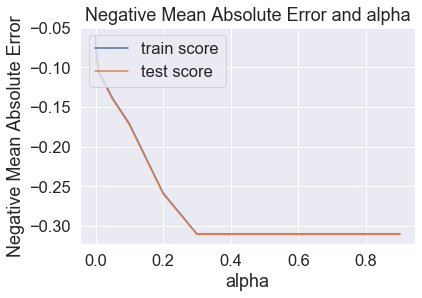

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

###### Observation:

As the negative mean absolute error for the test data is tending towards 0 for the value ,approximately,close to 0.01.the optimal value of alpha has been chosen as 0.01.<br>

Also,multiple models have been built with alpha ranging between 0.001 and 0.3 and it has been observed that the r2 score slightly decreased when alpha is over or below 0.01.<br>

From the above tabular representation of alpha and the mean train and test scores,it has been noticed that for values 0.0001,0.001,there is a huge difference in the train and test scores.<br>

After analysing all these observations,optimal value of alpha is chosen as 0.01.

###### Fitting the model on the train data with the optimal value of alpha

In [69]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
lasso.coef_

array([ 0.        ,  0.00806911,  0.05376931, -0.11934848,  0.        ,
        0.        ,  0.        , -0.        ,  0.05202474, -0.        ,
        0.15028472,  0.        ,  0.        , -0.01847543,  0.04946492,
       -0.        ,  0.06330534,  0.01174098,  0.        ,  0.        ,
        0.        ,  0.00493242, -0.02079995, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.0142574 , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.00871241,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

In [71]:
help(lasso)

Help on Lasso in module sklearn.linear_model.coordinate_descent object:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object 

In [72]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       ...
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=263)

###### Analysing the non-zero Lasso coefficients

In [73]:
lasso_features=pd.concat([pd.Series(X_train.columns),pd.Series(lasso.coef_)],axis=1)
lasso_features.columns=['col','coeff']
lasso_features[lasso_features['coeff']!=0].sort_values(by='coeff')

,col,coeff
3,YearBuilt,-0.119348
226,ExterQual_TA,-0.021931
22,PoolArea,-0.020800
13,KitchenAbvGr,-0.018475
251,KitchenQual_TA,-0.017446
52,GarageFinish_Unf,-0.008712
244,HeatingQC_TA,-0.007863
158,Condition1_Norm,0.000639
21,ScreenPorch,0.004932
1,LotArea,0.008069


In [74]:
#lasso_features .to_csv('lasso_coeff.csv')

In [75]:
#ridge_features.to_csv('ridge_coeff.csv')

###### Prediction using Lasso model

In [76]:
y_train_pred_lasso=lasso.predict(X_train)
y_train_pred_lasso

array([11.40972853, 12.61653899, 11.68721596, ..., 12.52231169,
       12.45162423, 11.57416276])

###### R2 score of the Lasso model on the Train dataset

In [77]:
print(r2_score(y_train,y_train_pred_lasso))

0.8256279856319608


### 4.Test Evaluation and Final Analysis <a id='step4'></a>

###### Scaling the Test data

In [78]:
Num_cols

['LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [79]:
X_test[Num_cols]=scaler.transform(X_test[Num_cols])
X_test[Num_cols].head()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1436,0.049413,-0.144189,0.383154,0.008299,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.124502,...,0.265498,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.468306,0.612526
57,0.907108,0.112505,-0.533005,-1.079700,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,-0.124502,...,0.439515,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0.623338,1.359706
780,0.138140,-0.253368,-0.533005,-0.782973,-0.355087,-0.963574,-0.293313,1.500998,0.381881,-0.124502,...,-0.327104,1.025020,-0.391783,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,0.612526
382,0.611351,-0.120412,-0.533005,-1.145639,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,-0.124502,...,0.787551,0.414194,0.092125,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.612526
1170,0.522624,-0.058786,0.383154,-0.189519,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.124502,...,-0.534044,0.888388,-0.709347,-0.369395,-0.121922,-0.275126,16.629857,-0.084263,0.259457,-0.134653


#### 4.1 Evaluation using Ridge Regression Model<a id='step4.1'></a>

In [80]:
y_test_pred_ridge=ridge.predict(X_test)

Text(0, 0.5, 'y_test_pred_ridge')

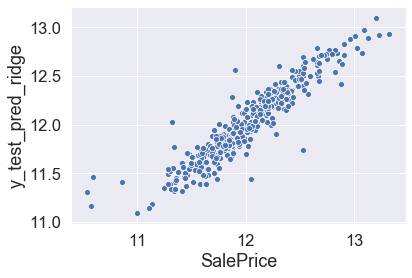

In [81]:
sns.scatterplot(x=y_test,y=y_test_pred_ridge)
plt.ylabel('y_test_pred_ridge')

In [82]:
print(r2_score(y_test,y_test_pred_ridge))

0.8649599312166025


#### 4.2 Evaluation using Lasso Regression Model<a id='step4.2'></a>

In [83]:
y_test_pred_lasso=lasso.predict(X_test)
y_test_pred_lasso

array([11.76904584, 12.17440163, 12.05626142, 12.24673052, 11.58520232,
       12.41096643, 12.30563826, 12.50134309, 11.6623631 , 12.04065037,
       12.13147944, 12.08563852, 11.98865506, 12.28832869, 11.61624409,
       11.8359992 , 12.06223717, 11.54511422, 11.8414651 , 11.67732307,
       11.91004535, 11.6491746 , 11.87521399, 11.81756666, 12.13631635,
       11.82146081, 11.14360833, 11.58644877, 12.19435665, 11.8563542 ,
       11.94314492, 12.17704478, 12.40584047, 11.4493049 , 11.69177892,
       11.39220653, 11.70639773, 11.43113475, 11.99454432, 11.76896189,
       12.51832765, 12.17129854, 11.68563378, 11.46253487, 11.89802682,
       11.35828364, 12.26207806, 11.80331892, 11.97034852, 11.60846572,
       12.38333781, 11.79099433, 12.83648231, 12.22288118, 11.98192979,
       11.76564829, 11.34338411, 12.12084388, 11.81415926, 12.66704434,
       11.92694722, 12.33205182, 12.00675535, 11.88486834, 12.10636926,
       12.27313655, 11.71432991, 11.73763266, 12.17986773, 11.96

Text(0, 0.5, 'y_test_pred_lasso')

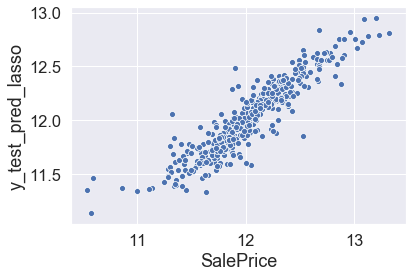

In [84]:
sns.scatterplot(x=y_test,y=y_test_pred_lasso)
plt.ylabel('y_test_pred_lasso')

In [85]:
print(r2_score(y_test,y_test_pred_lasso))

0.8226540272182706


#### Final Analysis:

##### 1. Evaluation of the best model:<br>
After analysing the R2 score of the Ridge and Lasso regression models

<b>Ridge</b>:<br>
Train 0.91<br>
Test  0.87<br>

<b>Lasso</b>:<br>
Train 0.83<br>
Test  0.82<br>

As R2 score dropped drastically on the Test data using the Ridge model compared to that Lasso,it would be preferable to use Lasso Regression model for the current usecase.




#### 2.Important predictor variables:

From the Lasso regression model,the important variables that can highly impact the SalePrice of the houses ,in the decreasing order of their coeffient values are:<br>

                    column                 coeffient value
                    GrLivArea                  0.15
                    GarageArea                 0.063
                    OverallCond                0.054
                    TotalBsmtSF                0.052
                    Fireplaces                 0.049
                    BsmtFinType1_GLQ           0.034
                    Foundation_PConc           0.027
                    GarageType_Attchd          0.014
                    WoodDeckSF                 0.012
                    LotArea                    0.008
                    ScreenPorch                0.005
                    Condition1_Norm            0.001
                    HeatingQC_TA              -0.008
                    GarageFinish_Unf          -0.009
                    KitchenQual_TA            -0.017
                    KitchenAbvGr              -0.018
                    PoolArea                  -0.021
                    ExterQual_TA              -0.022
                    YearBuilt                 -0.119


Of the above variables, the  top 6 important variables that can be considered for developing strategies into entering the Australian housing market in the decreasing order of the "MAGNITUDE" of coefficents/importance are:<br>

                  column                 coeffient value
                GrLivArea                  0.15
                YearBuilt                  0.119
                GarageArea                 0.063
                OverallCond                0.054
                TotalBsmtSF                0.052
                Fireplaces                 0.049
                
The predictor variables - Living area on the ground,Area of the garage,Overall condition of the house,Total Square feet of the basement area, and the number of Fireplaces have a positive correlative with the Sale price.   <br>             
               
Please note that "YearBuilt" variable has been considered because it is highly negatively correlated with SalePrice and hence the company has to consider it into planning as old houses have lower prices compared to newer ones.